In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
# %matplotlib widget
import pickle
plt.style.use(['science', 'nature'])
import numpy as np
from itertools import combinations, product

In [2]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA",  "Sierra"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]

palette=sns.color_palette(color, 7)
mm = 1/25.4

plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams['hatch.linewidth'] = 0.5

In [3]:
match_performance_df = pd.read_csv('/root/apabenchmark/data/performance/match_performance.tsv', sep='\t')
match_performance_df["tool"] = match_performance_df["tool"].map(tool_map)
match_performance_df["protocol"] = match_performance_df["protocol"].map(protocol_map)
match_performance_df["protocol"] = pd.Categorical(match_performance_df["protocol"], protocol_order)
match_performance_df["tool"] = pd.Categorical(match_performance_df["tool"], tool_order)


In [4]:
quantification_performance_df = pd.read_csv('/root/apabenchmark/data/performance/pas_quantification_performance.tsv', sep='\t')
# quantification_performance_df = quantification_performance_df.groupby(['tool', 'protocol']).mean(numeric_only=True).reset_index()
quantification_performance_df['protocol'] = quantification_performance_df['protocol'].map(protocol_map)
quantification_performance_df['tool'] = quantification_performance_df['tool'].map(tool_map)
quantification_performance_df['protocol'] = pd.Categorical(quantification_performance_df['protocol'], categories=protocol_order, ordered=True)
quantification_performance_df['tool'] = pd.Categorical(quantification_performance_df['tool'], categories=tool_order, ordered=True)

In [22]:
de_performance_df = pd.read_csv('/root/apabenchmark/data/performance/de_apa_performance.tsv', sep='\t')
de_performance_df["protocol"] = de_performance_df["protocol"].map(protocol_map)
de_performance_df["tool"] = de_performance_df["tool"].map(tool_map)
de_performance_df["protocol"] = pd.Categorical(de_performance_df["protocol"], categories=protocol_order)
de_performance_df["tool"] = pd.Categorical(de_performance_df["tool"], categories=tool_order)
de_performance_df = de_performance_df[de_performance_df["filter_type_1"].str.endswith("0.05")]

filter_type_2_list = [
    "PDUI_0.2",
    "PPUI_0.2",
    "RWUI_0.1",
    "DWUI_0.1",
    "MPRO_0.2",
    "dexseq_log2fc_0.5"
]
de_performance_filtered_df = de_performance_df[de_performance_df["filter_type_2"].isin(filter_type_2_list)]
de_performance_max_df = (de_performance_filtered_df
                         .groupby(['tool', 'sample'])
                         .apply(lambda x: x.sort_values('f1', ascending=False).head(1))
                         .reset_index(drop=True)
                        )


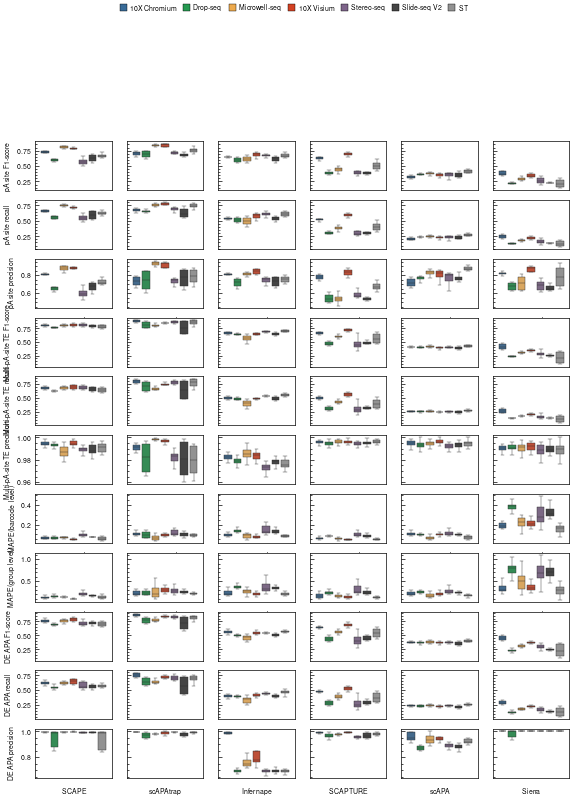

In [67]:
fig, axs = plt.subplots(11, 6, figsize=(175*mm, 210*mm),sharey='row')
for i in range(len(tool_order)):
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "pas")],
        x="protocol", y="f1", hue="protocol", ax=axs[0,i], palette=palette, showfliers=False, linewidth=0.3)
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "pas")],
        x="protocol", y="recall", hue="protocol", ax=axs[1,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "pas")],
        x="protocol", y="precision", hue="protocol", ax=axs[2,i], palette=palette, showfliers=False,linewidth=0.3)
    
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "te")],
        x="protocol", y="f1", hue="protocol", ax=axs[3,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "te")],
        x="protocol", y="recall", hue="protocol", ax=axs[4,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=match_performance_df[(match_performance_df["tool"] == tool_order[i]) & (match_performance_df["match_type"] == "te")],
        x="protocol", y="precision", hue="protocol", ax=axs[5,i], palette=palette, showfliers=False,linewidth=0.3)

    sns.boxplot(
        data=quantification_performance_df[(quantification_performance_df["tool"] == tool_order[i])],
        x="protocol", y="mape_pas", hue="protocol", ax=axs[6,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=quantification_performance_df[(quantification_performance_df["tool"] == tool_order[i])],
        x="protocol", y="mape_pas_ct", hue="protocol", ax=axs[7,i], palette=palette, showfliers=False,linewidth=0.3)
    

    sns.boxplot(
        data=de_performance_max_df[(de_performance_max_df["tool"] == tool_order[i])],
        x="protocol", y="f1", hue="protocol", ax=axs[8,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=de_performance_max_df[(de_performance_max_df["tool"] == tool_order[i])],
        x="protocol", y="recall", hue="protocol", ax=axs[9,i], palette=palette, showfliers=False,linewidth=0.3)
    sns.boxplot(
        data=de_performance_max_df[(de_performance_max_df["tool"] == tool_order[i])],
        x="protocol", y="precision", hue="protocol", ax=axs[10,i], palette=palette, showfliers=False,linewidth=0.3)

    for j in range(11):
        axs[j,i].set_xlim(axs[j,i].get_xlim()[0]-0.5, axs[j,i].get_xlim()[1]+0.5)
        axs[j,i].tick_params(which="both", bottom=False)
        axs[j,i].set_xticklabels([])

axs[0,0].set_ylabel("pA site F1-score")
axs[1,0].set_ylabel("pA site recall")
axs[2,0].set_ylabel("pA site precision")
axs[3,0].set_ylabel("Multi-pA-site TE F1-score")
axs[4,0].set_ylabel("Multi-pA-site TE recall")
axs[5,0].set_ylabel("Multi-pA-site TE precision")
axs[6,0].set_ylabel("MAPE (barcode level)")
axs[7,0].set_ylabel("MAPE (group level)")
axs[8,0].set_ylabel("DE APA F1-score")
axs[9,0].set_ylabel("DE APA recall")
axs[10,0].set_ylabel("DE APA precision")

for i, ax in enumerate(axs[10,:]):
    ax.set_xlabel(tool_order[i])
# make legend when ax have no legend
legend_labels = protocol_order
# set black line for legend
legend_handles = [plt.Rectangle((0,0),2,0.5, facecolor=palette[i], edgecolor="black", lw=0.3) for i in range(len(legend_labels))]
fig.legend(legend_handles, legend_labels, loc='upper center', ncol=len(legend_labels), bbox_to_anchor=(0.5, 1.05))



In [68]:
# plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0, left=0.08, right=0.999, top=0.95, bottom=0.05)

In [69]:
plt.savefig('/root/apabenchmark/plot/suppfig/suppfig7.pdf', bbox_inches='tight', dpi=300)